In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("co2_emission.csv")
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
df

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [9]:
df.columns = ['Country', 'Code', 'Year','CO2_Emissions']
print(df.isnull().sum())
df.dropna(subset=['CO2_Emissions'], inplace=True)
df['Year'] = df['Year'].astype(int)
df['CO2_Emissions'] = df['CO2_Emissions'].astype(float)

Country             0
Code             2207
Year                0
CO2_Emissions       0
dtype: int64


C:\Users\rajat\AppData\Local\Temp\ipykernel_2356\1001402070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_by_country.values, y=total_by_country.index, palette='rocket')


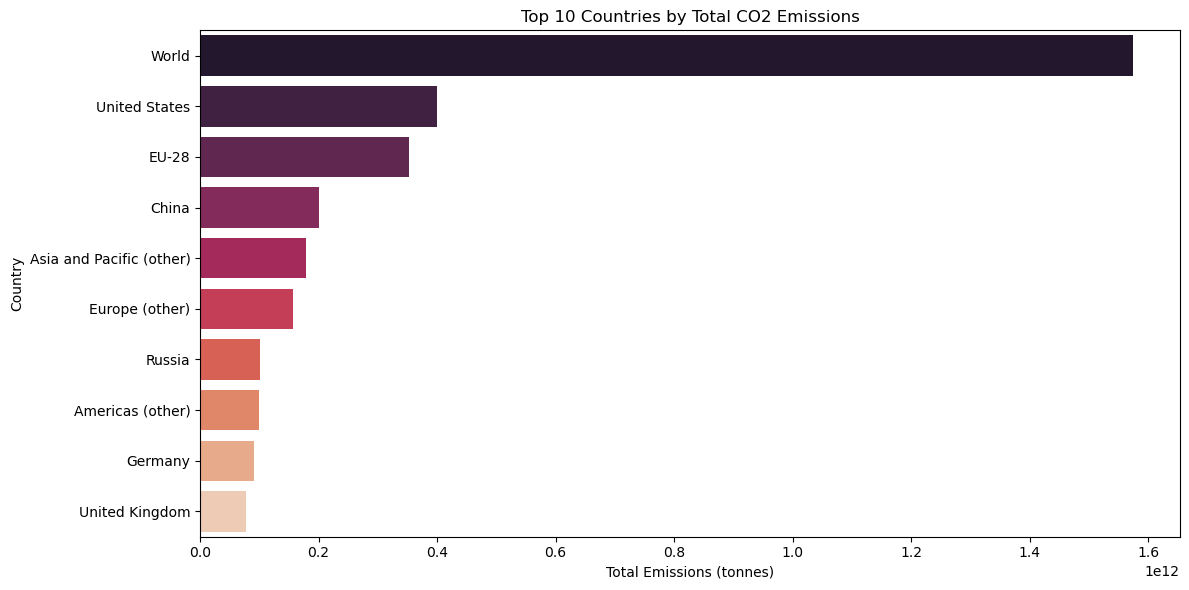

In [12]:
#Total Emission by Country
total_by_country = df.groupby('Country')['CO2_Emissions'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=total_by_country.values, y=total_by_country.index, palette='rocket')
plt.title('Top 10 Countries by Total CO2 Emissions')
plt.xlabel('Total Emissions (tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

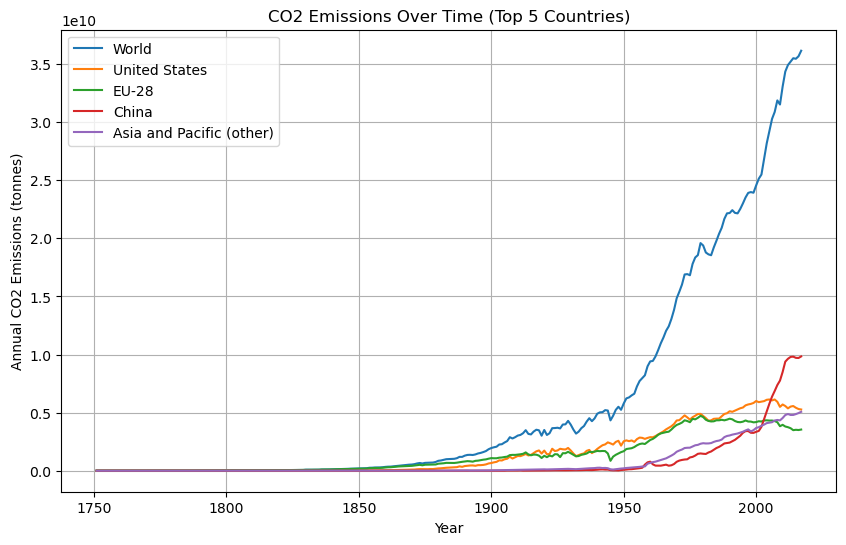

In [14]:
#Emissions Trend Over Time – Top 5 Emitters
top5_countries = total_by_country.head(5).index.tolist()
df_top5 = df[df['Country'].isin(top5_countries)]
plt.figure(figsize=(10,6))
for country in top5_countries:
    country_data = df_top5[df_top5['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_Emissions'], label=country)

plt.title('CO2 Emissions Over Time (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions (tonnes)')
plt.legend()
plt.grid(True)
plt.show()

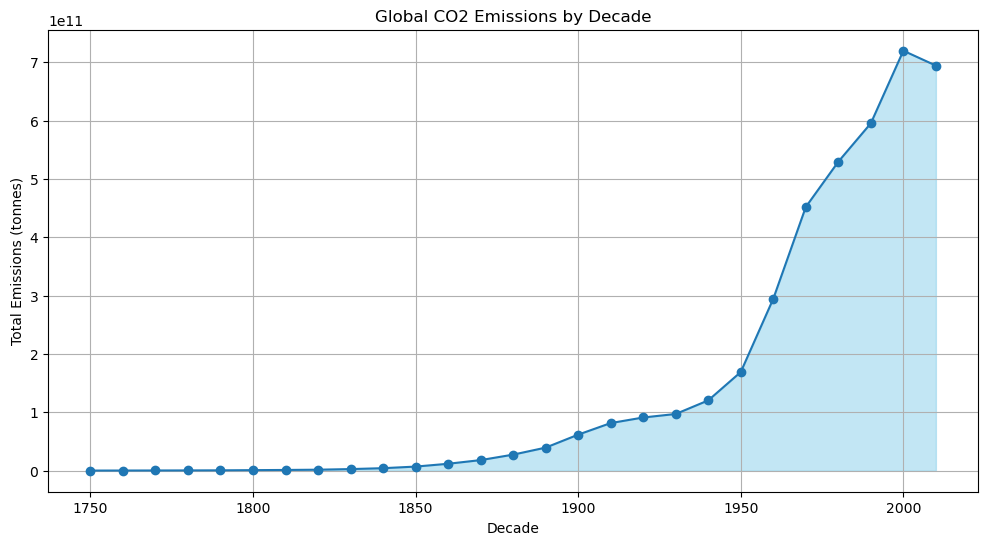

In [15]:
#Emissions by Decade – Global Total
df['Decade'] = (df['Year'] // 10)*10
#Global Emission per decade
emissions_by_decade = df.groupby('Decade')['CO2_Emissions'].sum()
plt.figure(figsize=(12,6))
plt.fill_between(emissions_by_decade.index, emissions_by_decade.values, color='skyblue',alpha=0.5)
plt.plot(emissions_by_decade.index, emissions_by_decade.values, marker='o')
plt.title('Global CO2 Emissions by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Emissions (tonnes)')
plt.grid(True)
plt.show()

C:\Users\rajat\AppData\Local\Temp\ipykernel_2356\3561483961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_increase.values, y=top_increase.index, palette='mako')


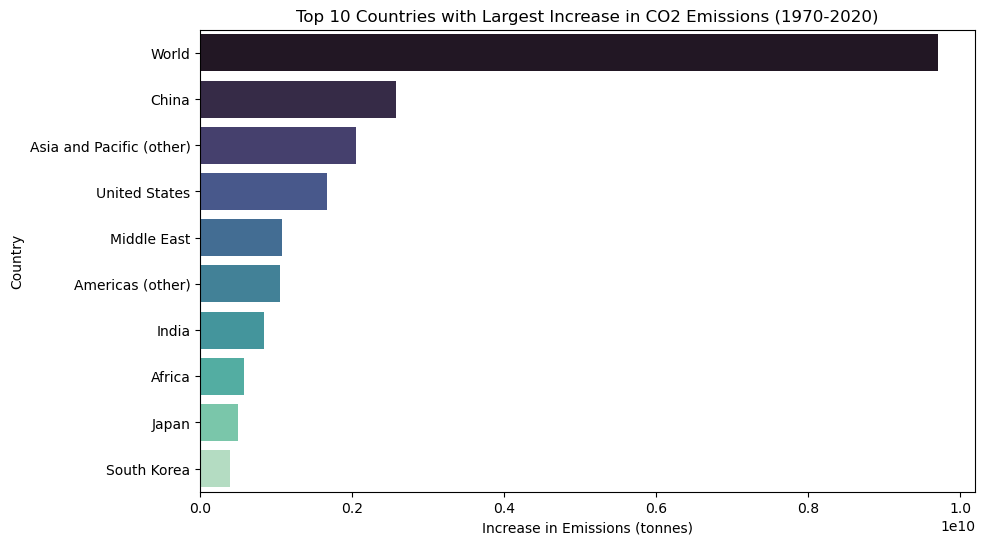

In [17]:
# Country with Sharpest Increase in Emissions (Last 50 Years)
recent_df = df[df['Year'] >= 1970]
pivot = recent_df.pivot_table(index='Year', columns='Country', values='CO2_Emissions')
#Calculate difference from 1970 to latest year
increase = pivot.loc[2000] - pivot.loc[1970]
top_increase = increase.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_increase.values, y=top_increase.index, palette='mako')
plt.title('Top 10 Countries with Largest Increase in CO2 Emissions (1970-2000)')
plt.xlabel('Increase in Emissions (tonnes)')
plt.show()

In [ ]:
print("Total Emissions (All Time):", df['CO2_Emissions'].sum())
print("Average Annual Emissions per Country:" ,df.groupby('Country')['CO2_Emissions'].mean().mean())
print("Year with Highest Global Emissions:"